# 1. Data Processing

In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import hierarchical
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
pd.pandas.set_option('display.max_columns',None)

C:\Users\ajith\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.hierarchical module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


### 1.1. Creation of a dataframe from the downloaded dataset for the period 2009-2018, concatenating Wales Employment values only (Total) and changing the names of the Industries.

In [2]:
df = pd.DataFrame()
for file in glob.glob("C:\CSVData\*.csv"):
    print(file)
    df = pd.concat([df, pd.read_csv(file).iloc[:,1:]], axis=1)
df = df.T.drop_duplicates().T
col_list = ['Unnamed: 1','Wales .1']
df = df[col_list]
df = df.drop(df.index[[0,1]], axis=0)
df.columns = ['Industry','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
df.Industry=['Agriculture','Production','Construction','Retail','ICT','Finance','Real_Estate','Professional_Service','Public_Administration','Other_Service']   
df.reset_index(drop=True, inplace = True)
df.to_csv("C:\Output\Wales_employment.csv")
df_wales = pd.read_csv("C:\Output\Wales_employment.csv")
df_wales = df_wales.drop(df_wales.columns[[0]], axis=1)
df_wales

C:\CSVData\Wales_2001.csv
C:\CSVData\Wales_2002.csv
C:\CSVData\Wales_2003.csv
C:\CSVData\Wales_2004.csv
C:\CSVData\Wales_2005.csv
C:\CSVData\Wales_2006.csv
C:\CSVData\Wales_2007.csv
C:\CSVData\Wales_2008.csv
C:\CSVData\Wales_2009.csv
C:\CSVData\Wales_2010.csv


Industry    2001    2002    2003    2004    2005    2006  \
0            Agriculture   32900   31000   32200   32900   34200   37100   
1             Production  209500  204200  199900  189300  180600  175700   
2           Construction   85100   87200   86400   92900   95900  107200   
3                 Retail  342600  340300  346300  353000  356100  352200   
4                    ICT   24800   25600   26300   27100   27900   28200   
5                Finance   26200   27200   28000   28700   31300   34400   
6            Real_Estate   11700   11800   12700   12700   14000   14900   
7   Professional_Service  106600  109200  113600  114400  127900  136800   
8  Public_Administration  355000  365900  386600  389700  394200  395900   
9          Other_Service   58100   64100   63900   67900   69800   69600   

     2007    2008    2009    2010  
0   37900   39100   37700   38200  
1  179500  182200  156700  149800  
2  105500  108100   96600   93200  
3  359300  356200  345400  344500  
4   28500   27700   27800   27900  
5   34600   34900   33800   29800  
6   15100   15300   13500   14600  
7  138500  139100  144800  145800  
8  405200  409900  415600  418600  
9   69700   63700   64200   68000

### 1.2. Checking the dataframe for any null values or outliers

In [3]:
df_null = df_wales.copy()
pd.DataFrame({'MissingValues':df_null.isnull().sum().values},index=df_null.columns)

MissingValues
Industry              0
2001                  0
2002                  0
2003                  0
2004                  0
2005                  0
2006                  0
2007                  0
2008                  0
2009                  0
2010                  0

#### The result obtained above shows that the dataframe does not contain any missing values or outliers.

In [4]:
df_null.isnull()

Industry   2001   2002   2003   2004   2005   2006   2007   2008   2009  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
5     False  False  False  False  False  False  False  False  False  False   
6     False  False  False  False  False  False  False  False  False  False   
7     False  False  False  False  False  False  False  False  False  False   
8     False  False  False  False  False  False  False  False  False  False   
9     False  False  False  False  False  False  False  False  False  False   

    2010  
0  False  
1  False  
2  False  
3  False  
4  False  
5  False  
6  False  
7  False  
8  False  
9  False

#### The boolean value 'False' evaluates integer 0 which indicates that there are no null (missing) values or outliers in the dataframe. 

In [5]:
df_null.set_index('Industry', inplace = True)
np.random.seed(0)
df_null1 = pd.DataFrame(np.random.randn(9, 10), columns=list(df_null.columns))
df_null1.iloc[::10] += np.random.randn() * 2  
Q1 = df_null.quantile(0.25)
Q3 = df_null.quantile(0.75)
IQR = Q3 - Q1
print((df_null1 < (Q1 - 1.5 * IQR)) | (df_null1 > (Q3 + 1.5 * IQR)))

    2001   2002   2003   2004   2005   2006   2007   2008   2009   2010
0  False  False  False  False  False  False  False  False  False  False
1  False  False  False  False  False  False  False  False  False  False
2  False  False  False  False  False  False  False  False  False  False
3  False  False  False  False  False  False  False  False  False  False
4  False  False  False  False  False  False  False  False  False  False
5  False  False  False  False  False  False  False  False  False  False
6  False  False  False  False  False  False  False  False  False  False
7  False  False  False  False  False  False  False  False  False  False
8  False  False  False  False  False  False  False  False  False  False


In [6]:
z_score = np.abs(stats.zscore(df_null))
threshold = 3
print(np.where(z_score > 3))

(array([], dtype=int64), array([], dtype=int64))


# 2. Data Analysis

### 2.1.	Which industry employed highest and lowest workers over the period?

In [7]:
df_total = df_wales.copy()
df_total

Industry    2001    2002    2003    2004    2005    2006  \
0            Agriculture   32900   31000   32200   32900   34200   37100   
1             Production  209500  204200  199900  189300  180600  175700   
2           Construction   85100   87200   86400   92900   95900  107200   
3                 Retail  342600  340300  346300  353000  356100  352200   
4                    ICT   24800   25600   26300   27100   27900   28200   
5                Finance   26200   27200   28000   28700   31300   34400   
6            Real_Estate   11700   11800   12700   12700   14000   14900   
7   Professional_Service  106600  109200  113600  114400  127900  136800   
8  Public_Administration  355000  365900  386600  389700  394200  395900   
9          Other_Service   58100   64100   63900   67900   69800   69600   

     2007    2008    2009    2010  
0   37900   39100   37700   38200  
1  179500  182200  156700  149800  
2  105500  108100   96600   93200  
3  359300  356200  345400  344500  
4   28500   27700   27800   27900  
5   34600   34900   33800   29800  
6   15100   15300   13500   14600  
7  138500  139100  144800  145800  
8  405200  409900  415600  418600  
9   69700   63700   64200   68000

In [8]:
df_total.loc[:,'Total'] = df_total.sum(axis=1)
df_total

Industry    2001    2002    2003    2004    2005    2006  \
0            Agriculture   32900   31000   32200   32900   34200   37100   
1             Production  209500  204200  199900  189300  180600  175700   
2           Construction   85100   87200   86400   92900   95900  107200   
3                 Retail  342600  340300  346300  353000  356100  352200   
4                    ICT   24800   25600   26300   27100   27900   28200   
5                Finance   26200   27200   28000   28700   31300   34400   
6            Real_Estate   11700   11800   12700   12700   14000   14900   
7   Professional_Service  106600  109200  113600  114400  127900  136800   
8  Public_Administration  355000  365900  386600  389700  394200  395900   
9          Other_Service   58100   64100   63900   67900   69800   69600   

     2007    2008    2009    2010    Total  
0   37900   39100   37700   38200   353200  
1  179500  182200  156700  149800  1827400  
2  105500  108100   96600   93200   958100  
3  359300  356200  345400  344500  3495900  
4   28500   27700   27800   27900   271800  
5   34600   34900   33800   29800   308900  
6   15100   15300   13500   14600   136300  
7  138500  139100  144800  145800  1276700  
8  405200  409900  415600  418600  3936600  
9   69700   63700   64200   68000   659000

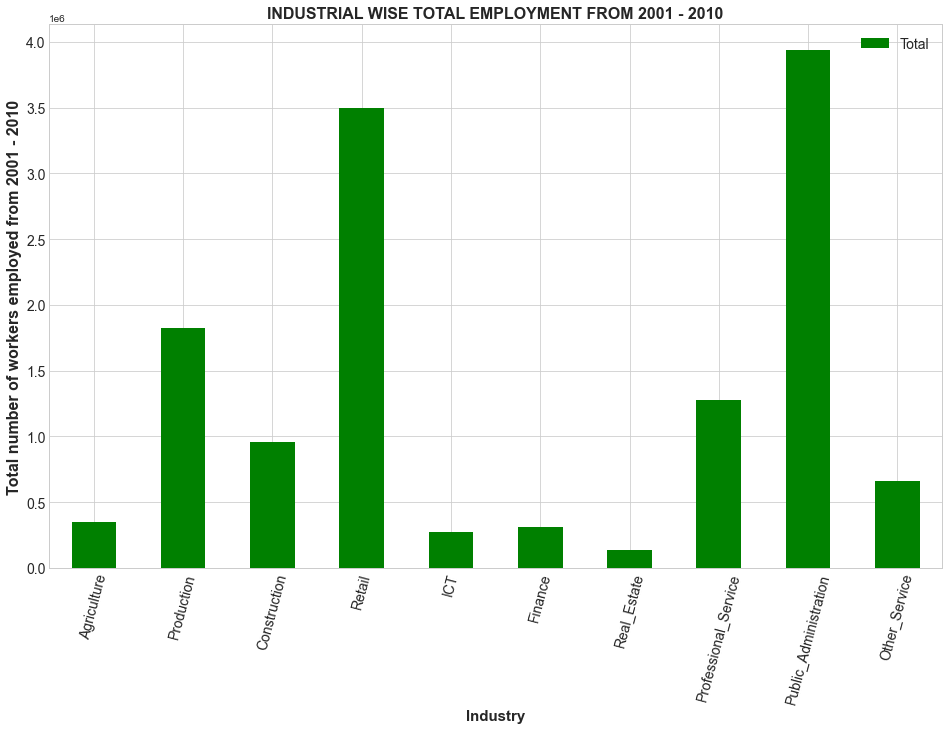

In [9]:
df_total.plot.bar("Industry", "Total", rot = 75, fontsize = 14, color = 'g', figsize = (16,10))
plt.xlabel("Industry", fontweight = 'bold', fontsize = 15)
plt.ylabel('Total number of workers employed from 2001 - 2010',fontweight='bold',fontsize=16)
plt.title("INDUSTRIAL WISE TOTAL EMPLOYMENT FROM 2001 - 2010", fontweight = 'bold', fontsize = 16)
plt.legend(loc = "best", fontsize = '14')
plt.show()

#### The above bar graph shows that Public_Administration has the highest number of workers and Real_Estate has the lowest number of workers over the period from 2001 to 2010

In [10]:
df_sorted = df_total.sort_values(by = 'Total', ascending = False)
df_sorted

Industry    2001    2002    2003    2004    2005    2006  \
8  Public_Administration  355000  365900  386600  389700  394200  395900   
3                 Retail  342600  340300  346300  353000  356100  352200   
1             Production  209500  204200  199900  189300  180600  175700   
7   Professional_Service  106600  109200  113600  114400  127900  136800   
2           Construction   85100   87200   86400   92900   95900  107200   
9          Other_Service   58100   64100   63900   67900   69800   69600   
0            Agriculture   32900   31000   32200   32900   34200   37100   
5                Finance   26200   27200   28000   28700   31300   34400   
4                    ICT   24800   25600   26300   27100   27900   28200   
6            Real_Estate   11700   11800   12700   12700   14000   14900   

     2007    2008    2009    2010    Total  
8  405200  409900  415600  418600  3936600  
3  359300  356200  345400  344500  3495900  
1  179500  182200  156700  149800  1827400  
7  138500  139100  144800  145800  1276700  
2  105500  108100   96600   93200   958100  
9   69700   63700   64200   68000   659000  
0   37900   39100   37700   38200   353200  
5   34600   34900   33800   29800   308900  
4   28500   27700   27800   27900   271800  
6   15100   15300   13500   14600   136300

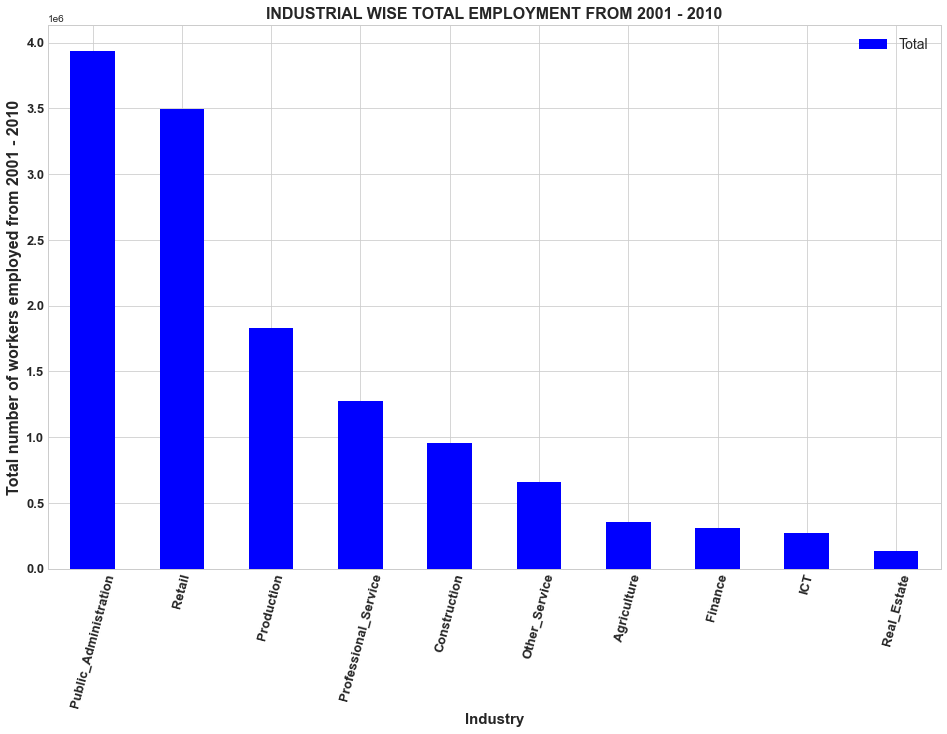

In [11]:
df_sorted.plot.bar("Industry", "Total", rot = 75, fontsize = 15, color = 'b', figsize = (16,10))
plt.xlabel("Industry", fontweight = 'bold', fontsize = 15)
plt.ylabel('Total number of workers employed from 2001 - 2010',fontweight='bold',fontsize=16)
plt.title("INDUSTRIAL WISE TOTAL EMPLOYMENT FROM 2001 - 2010", fontweight = 'bold', fontsize = 16)
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.yticks(fontsize = 13, fontweight = 'bold')
plt.legend(loc = "best", fontsize = 14)
plt.show()

#### The above bar graph shows that the total number of workers sorted in decending Industrial wise over the period.  The graph shows that Public_Administration has the highest number of workers and Real_Estate has the lowest number of workers over the period from 2001 to 2010 

### 2.2.	Which industry has the highest and lowest overall growth over the period? 

In [12]:
dfp = df_wales.copy()
dfp.set_index('Industry', inplace = True)
dfp2 = dfp.pct_change(axis=1)
dfp2

2001      2002      2003      2004      2005      2006  \
Industry                                                                        
Agriculture             NaN -0.057751  0.038710  0.021739  0.039514  0.084795   
Production              NaN -0.025298 -0.021058 -0.053027 -0.045959 -0.027132   
Construction            NaN  0.024677 -0.009174  0.075231  0.032293  0.117831   
Retail                  NaN -0.006713  0.017632  0.019347  0.008782 -0.010952   
ICT                     NaN  0.032258  0.027344  0.030418  0.029520  0.010753   
Finance                 NaN  0.038168  0.029412  0.025000  0.090592  0.099042   
Real_Estate             NaN  0.008547  0.076271  0.000000  0.102362  0.064286   
Professional_Service    NaN  0.024390  0.040293  0.007042  0.118007  0.069586   
Public_Administration   NaN  0.030704  0.056573  0.008019  0.011547  0.004313   
Other_Service           NaN  0.103270 -0.003120  0.062598  0.027982 -0.002865   

                           2007      2008      2009      2010  
Industry                                                       
Agriculture            0.021563  0.031662 -0.035806  0.013263  
Production             0.021628  0.015042 -0.139956 -0.044033  
Construction          -0.015858  0.024645 -0.106383 -0.035197  
Retail                 0.020159 -0.008628 -0.030320 -0.002606  
ICT                    0.010638 -0.028070  0.003610  0.003597  
Finance                0.005814  0.008671 -0.031519 -0.118343  
Real_Estate            0.013423  0.013245 -0.117647  0.081481  
Professional_Service   0.012427  0.004332  0.040978  0.006906  
Public_Administration  0.023491  0.011599  0.013906  0.007218  
Other_Service          0.001437 -0.086083  0.007849  0.059190

In [13]:
dfp2["2009"] = dfp2["2009"].fillna(0)
dfp2.reset_index()

Industry  2001      2002      2003      2004      2005  \
0            Agriculture   NaN -0.057751  0.038710  0.021739  0.039514   
1             Production   NaN -0.025298 -0.021058 -0.053027 -0.045959   
2           Construction   NaN  0.024677 -0.009174  0.075231  0.032293   
3                 Retail   NaN -0.006713  0.017632  0.019347  0.008782   
4                    ICT   NaN  0.032258  0.027344  0.030418  0.029520   
5                Finance   NaN  0.038168  0.029412  0.025000  0.090592   
6            Real_Estate   NaN  0.008547  0.076271  0.000000  0.102362   
7   Professional_Service   NaN  0.024390  0.040293  0.007042  0.118007   
8  Public_Administration   NaN  0.030704  0.056573  0.008019  0.011547   
9          Other_Service   NaN  0.103270 -0.003120  0.062598  0.027982   

       2006      2007      2008      2009      2010  
0  0.084795  0.021563  0.031662 -0.035806  0.013263  
1 -0.027132  0.021628  0.015042 -0.139956 -0.044033  
2  0.117831 -0.015858  0.024645 -0.106383 -0.035197  
3 -0.010952  0.020159 -0.008628 -0.030320 -0.002606  
4  0.010753  0.010638 -0.028070  0.003610  0.003597  
5  0.099042  0.005814  0.008671 -0.031519 -0.118343  
6  0.064286  0.013423  0.013245 -0.117647  0.081481  
7  0.069586  0.012427  0.004332  0.040978  0.006906  
8  0.004313  0.023491  0.011599  0.013906  0.007218  
9 -0.002865  0.001437 -0.086083  0.007849  0.059190

In [14]:
dfp2.loc[:,'Total'] = dfp2.sum(axis = 1)
dfp3 = dfp2.reset_index()
dfp3 = dfp3.sort_values(by='Total', ascending = False)
dfp3

Industry  2001      2002      2003      2004      2005  \
7   Professional_Service   NaN  0.024390  0.040293  0.007042  0.118007   
6            Real_Estate   NaN  0.008547  0.076271  0.000000  0.102362   
9          Other_Service   NaN  0.103270 -0.003120  0.062598  0.027982   
8  Public_Administration   NaN  0.030704  0.056573  0.008019  0.011547   
0            Agriculture   NaN -0.057751  0.038710  0.021739  0.039514   
5                Finance   NaN  0.038168  0.029412  0.025000  0.090592   
4                    ICT   NaN  0.032258  0.027344  0.030418  0.029520   
2           Construction   NaN  0.024677 -0.009174  0.075231  0.032293   
3                 Retail   NaN -0.006713  0.017632  0.019347  0.008782   
1             Production   NaN -0.025298 -0.021058 -0.053027 -0.045959   

       2006      2007      2008      2009      2010     Total  
7  0.069586  0.012427  0.004332  0.040978  0.006906  0.323961  
6  0.064286  0.013423  0.013245 -0.117647  0.081481  0.241968  
9 -0.002865  0.001437 -0.086083  0.007849  0.059190  0.170258  
8  0.004313  0.023491  0.011599  0.013906  0.007218  0.167370  
0  0.084795  0.021563  0.031662 -0.035806  0.013263  0.157690  
5  0.099042  0.005814  0.008671 -0.031519 -0.118343  0.146836  
4  0.010753  0.010638 -0.028070  0.003610  0.003597  0.120068  
2  0.117831 -0.015858  0.024645 -0.106383 -0.035197  0.108065  
3 -0.010952  0.020159 -0.008628 -0.030320 -0.002606  0.006701  
1 -0.027132  0.021628  0.015042 -0.139956 -0.044033 -0.319793

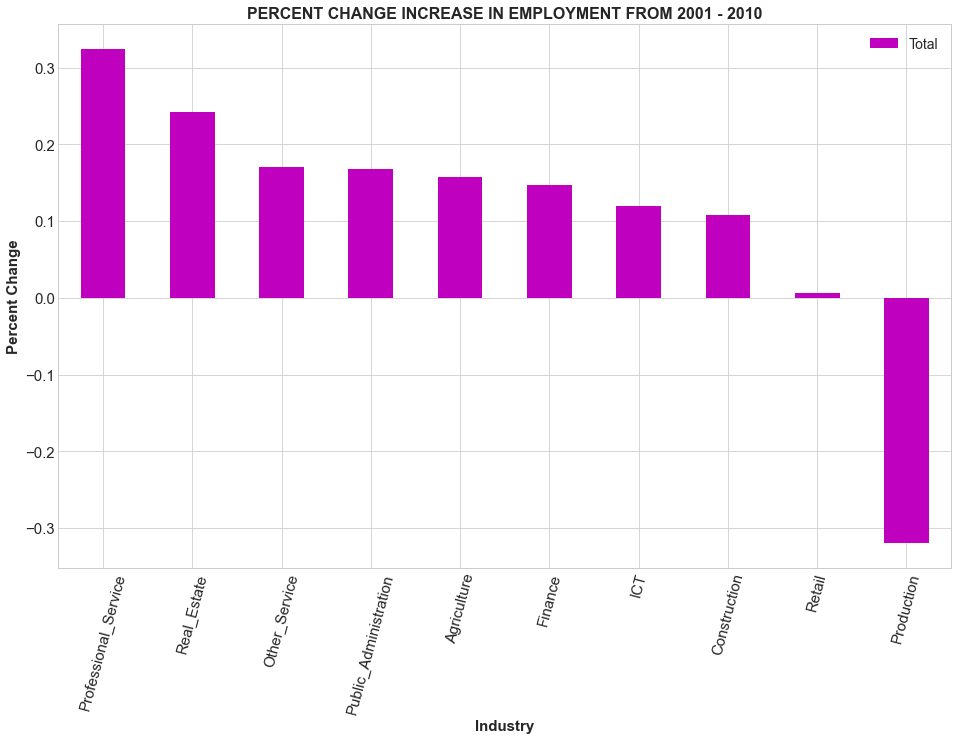

In [15]:
dfp3.plot.bar("Industry", "Total", rot = 75, fontsize = 15, color = 'm', figsize = (16,10))
plt.xlabel("Industry", fontweight = 'bold', fontsize = 15)
plt.ylabel('Percent Change',fontweight='bold',fontsize=15)
plt.title("PERCENT CHANGE INCREASE IN EMPLOYMENT FROM 2001 - 2010", fontweight = 'bold', fontsize = 16)
plt.legend(loc = "best", fontsize = 14)
plt.show()

#### The above bar graph shows that Professional_Service has the highest overall growth and Production has the lowest overall growth over the period from 2001 to 2010.

### 2.3. Which years are the best and worst performing year in relation to the number of employment (highest and               lowest employment)?

In [16]:
df_col_tot = df_wales.copy()
df_col_tot = df_col_tot.groupby(['Industry']).sum()
df_col_tot.loc['Total'] = df_col_tot.sum()
df_col_tot

2001     2002     2003     2004     2005     2006  \
Industry                                                                      
Agriculture              32900    31000    32200    32900    34200    37100   
Construction             85100    87200    86400    92900    95900   107200   
Finance                  26200    27200    28000    28700    31300    34400   
ICT                      24800    25600    26300    27100    27900    28200   
Other_Service            58100    64100    63900    67900    69800    69600   
Production              209500   204200   199900   189300   180600   175700   
Professional_Service    106600   109200   113600   114400   127900   136800   
Public_Administration   355000   365900   386600   389700   394200   395900   
Real_Estate              11700    11800    12700    12700    14000    14900   
Retail                  342600   340300   346300   353000   356100   352200   
Total                  1252500  1266500  1295900  1308600  1331900  1352000   

                          2007     2008     2009     2010  
Industry                                                   
Agriculture              37900    39100    37700    38200  
Construction            105500   108100    96600    93200  
Finance                  34600    34900    33800    29800  
ICT                      28500    27700    27800    27900  
Other_Service            69700    63700    64200    68000  
Production              179500   182200   156700   149800  
Professional_Service    138500   139100   144800   145800  
Public_Administration   405200   409900   415600   418600  
Real_Estate              15100    15300    13500    14600  
Retail                  359300   356200   345400   344500  
Total                  1373800  1376200  1336100  1330400

In [17]:
df_tot = df_col_tot[[c for c in sorted(list(df_col_tot.columns), key=df_col_tot.iloc[-1].get, reverse=True)]]
df_tot.reset_index()
df_tot

2008     2007     2006     2009     2005     2010  \
Industry                                                                      
Agriculture              39100    37900    37100    37700    34200    38200   
Construction            108100   105500   107200    96600    95900    93200   
Finance                  34900    34600    34400    33800    31300    29800   
ICT                      27700    28500    28200    27800    27900    27900   
Other_Service            63700    69700    69600    64200    69800    68000   
Production              182200   179500   175700   156700   180600   149800   
Professional_Service    139100   138500   136800   144800   127900   145800   
Public_Administration   409900   405200   395900   415600   394200   418600   
Real_Estate              15300    15100    14900    13500    14000    14600   
Retail                  356200   359300   352200   345400   356100   344500   
Total                  1376200  1373800  1352000  1336100  1331900  1330400   

                          2004     2003     2002     2001  
Industry                                                   
Agriculture              32900    32200    31000    32900  
Construction             92900    86400    87200    85100  
Finance                  28700    28000    27200    26200  
ICT                      27100    26300    25600    24800  
Other_Service            67900    63900    64100    58100  
Production              189300   199900   204200   209500  
Professional_Service    114400   113600   109200   106600  
Public_Administration   389700   386600   365900   355000  
Real_Estate              12700    12700    11800    11700  
Retail                  353000   346300   340300   342600  
Total                  1308600  1295900  1266500  1252500

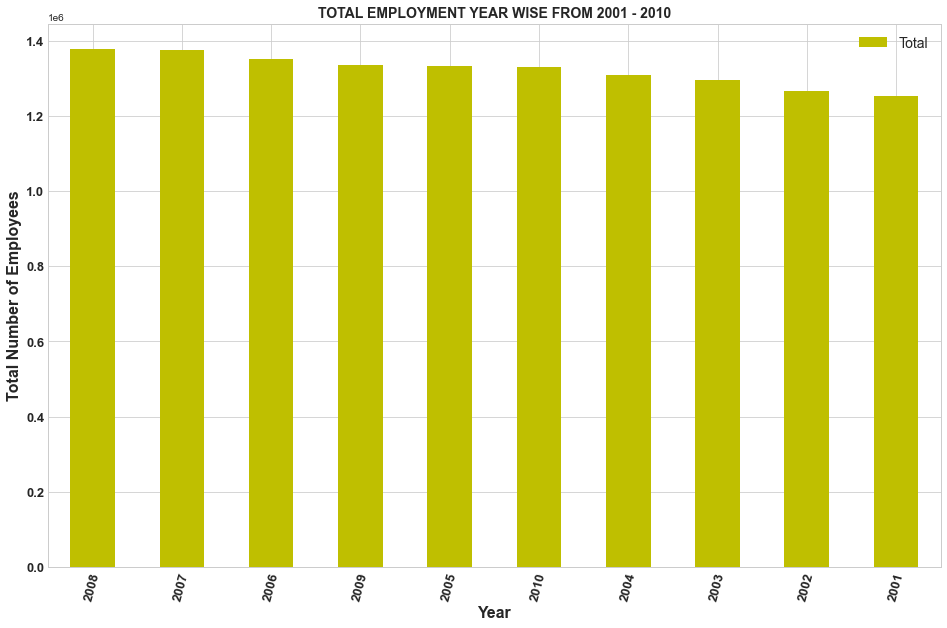

In [18]:
df_tot.query('Industry == "Total"').T.plot.bar(color = 'y',figsize=(16,10))
plt.xlabel('Year', fontweight = 'bold', fontsize = 16)
plt.ylabel('Total Number of Employees',fontweight='bold',fontsize=16)
plt.title("TOTAL EMPLOYMENT YEAR WISE FROM 2001 - 2010", fontweight = 'bold', fontsize = 14)
plt.xticks(fontsize=13,fontweight='bold',rotation=75)
plt.yticks(fontsize=13,fontweight='bold')
plt.legend(loc = "best", fontsize = 14)
plt.show()

#### The above bar graph shows that 2008 is the best performing year and 2001 is the worst performing year in relation to the number of employment.

# 3. Visual Analysis

### Create a dynamic scatter/bubble plot showing the change of workforce number over the period using Plotly express. 

In [19]:
df_workforce = df_wales.copy()
df_workforce_melted = df_workforce.melt(id_vars=["Industry"], var_name="Year")
df_workforce_melted

Industry  Year   value
0             Agriculture  2001   32900
1              Production  2001  209500
2            Construction  2001   85100
3                  Retail  2001  342600
4                     ICT  2001   24800
..                    ...   ...     ...
95                Finance  2010   29800
96            Real_Estate  2010   14600
97   Professional_Service  2010  145800
98  Public_Administration  2010  418600
99          Other_Service  2010   68000

[100 rows x 3 columns]

In [20]:
df_workforce_melted.rename(columns={'value':'Employees'}, inplace = True)
df_workforce_melted

Industry  Year  Employees
0             Agriculture  2001      32900
1              Production  2001     209500
2            Construction  2001      85100
3                  Retail  2001     342600
4                     ICT  2001      24800
..                    ...   ...        ...
95                Finance  2010      29800
96            Real_Estate  2010      14600
97   Professional_Service  2010     145800
98  Public_Administration  2010     418600
99          Other_Service  2010      68000

[100 rows x 3 columns]

In [21]:
fig = px.scatter(df_workforce_melted, x="Year", y="Employees", animation_frame="Year", animation_group = "Industry", 
           size="Employees", color="Industry", hover_name="Industry", log_x=True, size_max=45, range_x=[2001,2010],
           range_y=[1000,500000], labels = dict(Employees = "Workforce Employment"))
fig.show()

#### The above bubble plot shows the years from 2001 to 2010 on x-axis and workforce employment on y-axis. By using the date values in the animation frame, the complete time period is animated.  The plot depicts the workforce employment and years in bubbles format as the animation plays, from the beginning to the end of the time period. The data relating to the change in workforce over time is displayed while the cursor hovers over the bubbles.


# 4. Correlation

### 4.1. Taking average employment number for each industry over the period, show and identify the highest and lowest correlated industries.

In [22]:
df_mean = df_wales.copy()
df_mean

Industry    2001    2002    2003    2004    2005    2006  \
0            Agriculture   32900   31000   32200   32900   34200   37100   
1             Production  209500  204200  199900  189300  180600  175700   
2           Construction   85100   87200   86400   92900   95900  107200   
3                 Retail  342600  340300  346300  353000  356100  352200   
4                    ICT   24800   25600   26300   27100   27900   28200   
5                Finance   26200   27200   28000   28700   31300   34400   
6            Real_Estate   11700   11800   12700   12700   14000   14900   
7   Professional_Service  106600  109200  113600  114400  127900  136800   
8  Public_Administration  355000  365900  386600  389700  394200  395900   
9          Other_Service   58100   64100   63900   67900   69800   69600   

     2007    2008    2009    2010  
0   37900   39100   37700   38200  
1  179500  182200  156700  149800  
2  105500  108100   96600   93200  
3  359300  356200  345400  344500  
4   28500   27700   27800   27900  
5   34600   34900   33800   29800  
6   15100   15300   13500   14600  
7  138500  139100  144800  145800  
8  405200  409900  415600  418600  
9   69700   63700   64200   68000

In [23]:
df_mean.set_index('Industry', inplace = True)
df_mean['mean'] = df_mean.mean(axis = 1)
df_mean

2001    2002    2003    2004    2005    2006    2007  \
Industry                                                                        
Agriculture             32900   31000   32200   32900   34200   37100   37900   
Production             209500  204200  199900  189300  180600  175700  179500   
Construction            85100   87200   86400   92900   95900  107200  105500   
Retail                 342600  340300  346300  353000  356100  352200  359300   
ICT                     24800   25600   26300   27100   27900   28200   28500   
Finance                 26200   27200   28000   28700   31300   34400   34600   
Real_Estate             11700   11800   12700   12700   14000   14900   15100   
Professional_Service   106600  109200  113600  114400  127900  136800  138500   
Public_Administration  355000  365900  386600  389700  394200  395900  405200   
Other_Service           58100   64100   63900   67900   69800   69600   69700   

                         2008    2009    2010      mean  
Industry                                                 
Agriculture             39100   37700   38200   35320.0  
Production             182200  156700  149800  182740.0  
Construction           108100   96600   93200   95810.0  
Retail                 356200  345400  344500  349590.0  
ICT                     27700   27800   27900   27180.0  
Finance                 34900   33800   29800   30890.0  
Real_Estate             15300   13500   14600   13630.0  
Professional_Service   139100  144800  145800  127670.0  
Public_Administration  409900  415600  418600  393660.0  
Other_Service           63700   64200   68000   65900.0

In [24]:
df_mean.reset_index()

Industry    2001    2002    2003    2004    2005    2006  \
0            Agriculture   32900   31000   32200   32900   34200   37100   
1             Production  209500  204200  199900  189300  180600  175700   
2           Construction   85100   87200   86400   92900   95900  107200   
3                 Retail  342600  340300  346300  353000  356100  352200   
4                    ICT   24800   25600   26300   27100   27900   28200   
5                Finance   26200   27200   28000   28700   31300   34400   
6            Real_Estate   11700   11800   12700   12700   14000   14900   
7   Professional_Service  106600  109200  113600  114400  127900  136800   
8  Public_Administration  355000  365900  386600  389700  394200  395900   
9          Other_Service   58100   64100   63900   67900   69800   69600   

     2007    2008    2009    2010      mean  
0   37900   39100   37700   38200   35320.0  
1  179500  182200  156700  149800  182740.0  
2  105500  108100   96600   93200   95810.0  
3  359300  356200  345400  344500  349590.0  
4   28500   27700   27800   27900   27180.0  
5   34600   34900   33800   29800   30890.0  
6   15100   15300   13500   14600   13630.0  
7  138500  139100  144800  145800  127670.0  
8  405200  409900  415600  418600  393660.0  
9   69700   63700   64200   68000   65900.0

In [25]:
dfc_st = StandardScaler().fit_transform(df_mean)
dfc_st

array([[-0.7419733 , -0.76309057, -0.75018767, -0.7508858 , -0.75705644,
        -0.75801162, -0.75067903, -0.73939264, -0.72294441, -0.712345  ,
        -0.74629964],
       [ 0.67689497,  0.61868974,  0.54159251,  0.44795596,  0.36258254,
         0.31294058,  0.31783877,  0.33457292,  0.17404636,  0.12588467,
         0.38886986],
       [-0.32257962, -0.31472998, -0.33268924, -0.29097208, -0.28518673,
        -0.21635398, -0.24056743, -0.22154761, -0.27897167, -0.29923898,
        -0.28051207],
       [ 1.74626851,  1.70448824,  1.66930043,  1.7027539 ,  1.70477271,
         1.67674334,  1.6746149 ,  1.640443  ,  1.59641745,  1.58827999,
         1.67365503],
       [-0.80705163, -0.80617148, -0.79563491, -0.79534413, -0.80523763,
        -0.82678128, -0.82161171, -0.82494965, -0.79756802, -0.78970849,
        -0.8089796 ],
       [-0.79580353, -0.79340677, -0.78253994, -0.78307976, -0.77923508,
        -0.77887432, -0.77558093, -0.77091365, -0.75234159, -0.77543756,
        -0.780

In [26]:
pca_c = PCA(n_components = 2)

In [27]:
pca_c.fit(dfc_st)

PCA(n_components=2)

In [28]:
prin_com = pca_c.transform(dfc_st)
prin_com

array([[-2.47029798e+00, -3.19364720e-02],
       [ 1.29693032e+00,  5.39366201e-01],
       [-9.29510526e-01, -6.34347583e-02],
       [ 5.54113094e+00,  1.33153096e-01],
       [-2.67716689e+00, -1.34027180e-03],
       [-2.58321840e+00, -3.11204278e-02],
       [-3.02262125e+00, -8.01784555e-03],
       [-1.21193664e-01, -2.71014173e-01],
       [ 6.65644272e+00, -2.59417671e-01],
       [-1.69049529e+00, -6.23767705e-03]])

In [29]:
prin_df = pd.DataFrame(data = prin_com, columns = ['PC1', 'PC2'])
prin_df

PC1       PC2
0 -2.470298 -0.031936
1  1.296930  0.539366
2 -0.929511 -0.063435
3  5.541131  0.133153
4 -2.677167 -0.001340
5 -2.583218 -0.031120
6 -3.022621 -0.008018
7 -0.121194 -0.271014
8  6.656443 -0.259418
9 -1.690495 -0.006238

In [30]:
final_prin_df = pd.concat([prin_df, df_wales[['Industry']]], axis = 1)
final_prin_df

PC1       PC2               Industry
0 -2.470298 -0.031936            Agriculture
1  1.296930  0.539366             Production
2 -0.929511 -0.063435           Construction
3  5.541131  0.133153                 Retail
4 -2.677167 -0.001340                    ICT
5 -2.583218 -0.031120                Finance
6 -3.022621 -0.008018            Real_Estate
7 -0.121194 -0.271014   Professional_Service
8  6.656443 -0.259418  Public_Administration
9 -1.690495 -0.006238          Other_Service

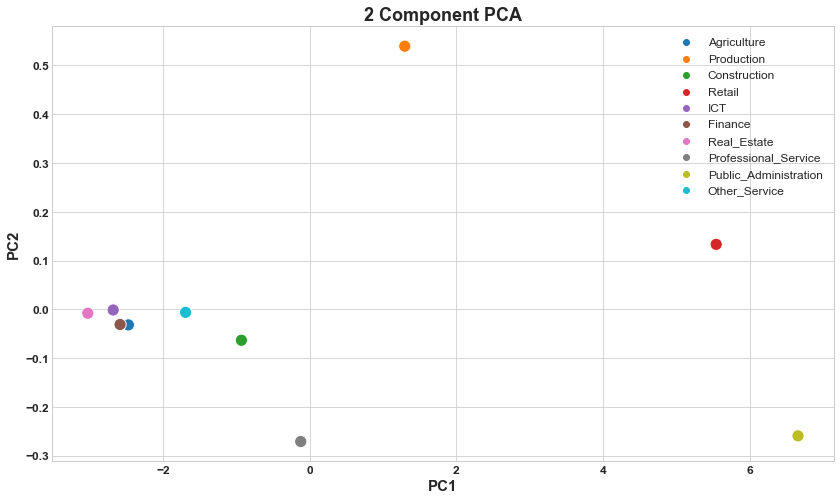

In [31]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='PC1', y='PC2', hue='Industry', data = final_prin_df, s=150)
plt.xlabel('PC1', fontsize = 15, fontweight = 'bold')
plt.ylabel('PC2', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.title('2 Component PCA', fontsize = 18, fontweight = 'bold')
plt.legend(fontsize='large', title_fontsize='20')
plt.show()

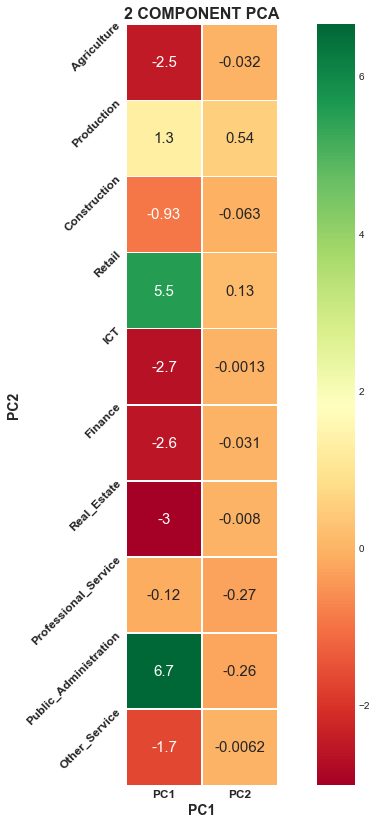

In [32]:
plt.figure(figsize=(14,14))
sns.heatmap(prin_df,annot=True,cbar= True,square = True, cmap='RdYlGn', linewidths=0.5, annot_kws={'size':15})
plt.ylim([10,0])
plt.xlabel('PC1', fontsize = 14, fontweight = 'bold')
plt.ylabel('PC2', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(np.arange(10),['Agriculture','Production','Construction','Retail','ICT','Finance','Real_Estate','Professional_Service','Public_Administration','Other_Service'], fontsize=12,fontweight='bold', rotation = 45)
plt.title('2 COMPONENT PCA', fontsize = 16, fontweight = 'bold')
plt.show()

In [95]:
df_corr_indus = df_wales.copy()
df_corr_indus

Industry    2001    2002    2003    2004    2005    2006  \
0            Agriculture   32900   31000   32200   32900   34200   37100   
1             Production  209500  204200  199900  189300  180600  175700   
2           Construction   85100   87200   86400   92900   95900  107200   
3                 Retail  342600  340300  346300  353000  356100  352200   
4                    ICT   24800   25600   26300   27100   27900   28200   
5                Finance   26200   27200   28000   28700   31300   34400   
6            Real_Estate   11700   11800   12700   12700   14000   14900   
7   Professional_Service  106600  109200  113600  114400  127900  136800   
8  Public_Administration  355000  365900  386600  389700  394200  395900   
9          Other_Service   58100   64100   63900   67900   69800   69600   

     2007    2008    2009    2010  
0   37900   39100   37700   38200  
1  179500  182200  156700  149800  
2  105500  108100   96600   93200  
3  359300  356200  345400  344500  
4   28500   27700   27800   27900  
5   34600   34900   33800   29800  
6   15100   15300   13500   14600  
7  138500  139100  144800  145800  
8  405200  409900  415600  418600  
9   69700   63700   64200   68000

In [96]:
df_corr_indus.set_index('Industry', inplace = True)
df_corr_indus

2001    2002    2003    2004    2005    2006    2007  \
Industry                                                                        
Agriculture             32900   31000   32200   32900   34200   37100   37900   
Production             209500  204200  199900  189300  180600  175700  179500   
Construction            85100   87200   86400   92900   95900  107200  105500   
Retail                 342600  340300  346300  353000  356100  352200  359300   
ICT                     24800   25600   26300   27100   27900   28200   28500   
Finance                 26200   27200   28000   28700   31300   34400   34600   
Real_Estate             11700   11800   12700   12700   14000   14900   15100   
Professional_Service   106600  109200  113600  114400  127900  136800  138500   
Public_Administration  355000  365900  386600  389700  394200  395900  405200   
Other_Service           58100   64100   63900   67900   69800   69600   69700   

                         2008    2009    2010  
Industry                                       
Agriculture             39100   37700   38200  
Production             182200  156700  149800  
Construction           108100   96600   93200  
Retail                 356200  345400  344500  
ICT                     27700   27800   27900  
Finance                 34900   33800   29800  
Real_Estate             15300   13500   14600  
Professional_Service   139100  144800  145800  
Public_Administration  409900  415600  418600  
Other_Service           63700   64200   68000

In [97]:
df_corr_indus = df_corr_indus.T
df_corr_indus

Industry  Agriculture  Production  Construction  Retail    ICT  Finance  \
2001            32900      209500         85100  342600  24800    26200   
2002            31000      204200         87200  340300  25600    27200   
2003            32200      199900         86400  346300  26300    28000   
2004            32900      189300         92900  353000  27100    28700   
2005            34200      180600         95900  356100  27900    31300   
2006            37100      175700        107200  352200  28200    34400   
2007            37900      179500        105500  359300  28500    34600   
2008            39100      182200        108100  356200  27700    34900   
2009            37700      156700         96600  345400  27800    33800   
2010            38200      149800         93200  344500  27900    29800   

Industry  Real_Estate  Professional_Service  Public_Administration  \
2001            11700                106600                 355000   
2002            11800                109200                 365900   
2003            12700                113600                 386600   
2004            12700                114400                 389700   
2005            14000                127900                 394200   
2006            14900                136800                 395900   
2007            15100                138500                 405200   
2008            15300                139100                 409900   
2009            13500                144800                 415600   
2010            14600                145800                 418600   

Industry  Other_Service  
2001              58100  
2002              64100  
2003              63900  
2004              67900  
2005              69800  
2006              69600  
2007              69700  
2008              63700  
2009              64200  
2010              68000

In [98]:
df_corr_indus = df_corr_indus.corr()
df_corr_indus

Industry               Agriculture  Production  Construction    Retail  \
Industry                                                                 
Agriculture               1.000000   -0.784576      0.805334  0.465915   
Production               -0.784576    1.000000     -0.471804 -0.185288   
Construction              0.805334   -0.471804      1.000000  0.768776   
Retail                    0.465915   -0.185288      0.768776  1.000000   
ICT                       0.779715   -0.785647      0.814260  0.710500   
Finance                   0.848558   -0.600223      0.948130  0.691785   
Real_Estate               0.889474   -0.669107      0.901371  0.713291   
Professional_Service      0.944490   -0.917499      0.733500  0.399583   
Public_Administration     0.839944   -0.902976      0.637329  0.448806   
Other_Service             0.335379   -0.519161      0.539532  0.622264   

Industry                    ICT   Finance  Real_Estate  Professional_Service  \
Industry                                                                       
Agriculture            0.779715  0.848558     0.889474              0.944490   
Production            -0.785647 -0.600223    -0.669107             -0.917499   
Construction           0.814260  0.948130     0.901371              0.733500   
Retail                 0.710500  0.691785     0.713291              0.399583   
ICT                    1.000000  0.859192     0.899419              0.868197   
Finance                0.859192  1.000000     0.880394              0.834370   
Real_Estate            0.899419  0.880394     1.000000              0.868385   
Professional_Service   0.868197  0.834370     0.868385              1.000000   
Public_Administration  0.882953  0.748768     0.812317              0.926752   
Other_Service          0.819949  0.505008     0.625447              0.498593   

Industry               Public_Administration  Other_Service  
Industry                                                     
Agriculture                         0.839944       0.335379  
Production                         -0.902976      -0.519161  
Construction                        0.637329       0.539532  
Retail                              0.448806       0.622264  
ICT                                 0.882953       0.819949  
Finance                             0.748768       0.505008  
Real_Estate                         0.812317       0.625447  
Professional_Service                0.926752       0.498593  
Public_Administration               1.000000       0.559379  
Other_Service                       0.559379       1.000000

In [99]:
df_corr_indus.reset_index()

Industry               Industry  Agriculture  Production  Construction  \
0                   Agriculture     1.000000   -0.784576      0.805334   
1                    Production    -0.784576    1.000000     -0.471804   
2                  Construction     0.805334   -0.471804      1.000000   
3                        Retail     0.465915   -0.185288      0.768776   
4                           ICT     0.779715   -0.785647      0.814260   
5                       Finance     0.848558   -0.600223      0.948130   
6                   Real_Estate     0.889474   -0.669107      0.901371   
7          Professional_Service     0.944490   -0.917499      0.733500   
8         Public_Administration     0.839944   -0.902976      0.637329   
9                 Other_Service     0.335379   -0.519161      0.539532   

Industry    Retail       ICT   Finance  Real_Estate  Professional_Service  \
0         0.465915  0.779715  0.848558     0.889474              0.944490   
1        -0.185288 -0.785647 -0.600223    -0.669107             -0.917499   
2         0.768776  0.814260  0.948130     0.901371              0.733500   
3         1.000000  0.710500  0.691785     0.713291              0.399583   
4         0.710500  1.000000  0.859192     0.899419              0.868197   
5         0.691785  0.859192  1.000000     0.880394              0.834370   
6         0.713291  0.899419  0.880394     1.000000              0.868385   
7         0.399583  0.868197  0.834370     0.868385              1.000000   
8         0.448806  0.882953  0.748768     0.812317              0.926752   
9         0.622264  0.819949  0.505008     0.625447              0.498593   

Industry  Public_Administration  Other_Service  
0                      0.839944       0.335379  
1                     -0.902976      -0.519161  
2                      0.637329       0.539532  
3                      0.448806       0.622264  
4                      0.882953       0.819949  
5                      0.748768       0.505008  
6                      0.812317       0.625447  
7                      0.926752       0.498593  
8                      1.000000       0.559379  
9                      0.559379       1.000000

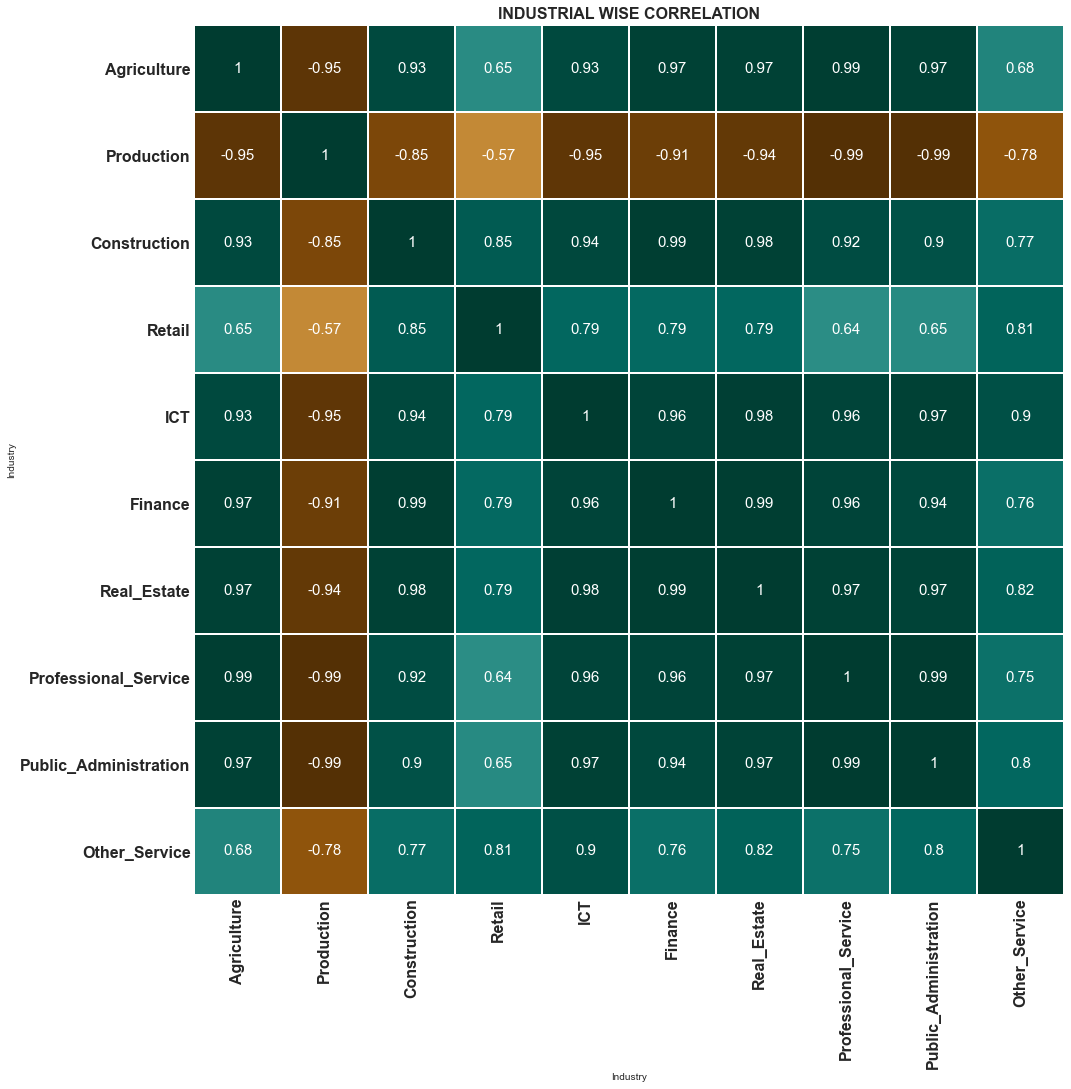

In [101]:
plt.figure(figsize=(16,16))
sns.heatmap(df_corr_indus.corr(), annot=True, cbar= False, cmap = 'BrBG', square = True, linewidths=0.5, linecolor = 'w', annot_kws={'size':15})
plt.ylim([10,0])
plt.xticks(fontsize=16,fontweight='bold', ha = 'center', rotation = 90)
plt.yticks(fontsize=16,fontweight='bold', ha = 'right', rotation = 0)
plt.title('INDUSTRIAL WISE CORRELATION', fontsize = 16, fontweight = 'bold')
plt.show()

#### Agriculture, Constructiion, ICT, Finance, Real Estate, Professional Service and Public Adminsitration are highly correlated and possess the high positive value (nearly equal to 1) indicating a strong positive correlation.  Production, Retail and Other Service are least correlated.

### 4.2. Make a year wise correlation for each industry.  Does the afore mentioned industries are also correlated over the each year?  Explain your answer?

In [33]:
df_corr_year = df_wales.copy()
df_corr_year

Industry    2001    2002    2003    2004    2005    2006  \
0            Agriculture   32900   31000   32200   32900   34200   37100   
1             Production  209500  204200  199900  189300  180600  175700   
2           Construction   85100   87200   86400   92900   95900  107200   
3                 Retail  342600  340300  346300  353000  356100  352200   
4                    ICT   24800   25600   26300   27100   27900   28200   
5                Finance   26200   27200   28000   28700   31300   34400   
6            Real_Estate   11700   11800   12700   12700   14000   14900   
7   Professional_Service  106600  109200  113600  114400  127900  136800   
8  Public_Administration  355000  365900  386600  389700  394200  395900   
9          Other_Service   58100   64100   63900   67900   69800   69600   

     2007    2008    2009    2010  
0   37900   39100   37700   38200  
1  179500  182200  156700  149800  
2  105500  108100   96600   93200  
3  359300  356200  345400  344500  
4   28500   27700   27800   27900  
5   34600   34900   33800   29800  
6   15100   15300   13500   14600  
7  138500  139100  144800  145800  
8  405200  409900  415600  418600  
9   69700   63700   64200   68000

In [34]:
df_corr_year = df_corr_year.corr()
df_corr_year

2001      2002      2003      2004      2005      2006      2007  \
2001  1.000000  0.999432  0.997770  0.996069  0.993002  0.989721  0.990094   
2002  0.999432  1.000000  0.999325  0.998184  0.995784  0.993051  0.993390   
2003  0.997770  0.999325  1.000000  0.999388  0.997830  0.995633  0.996057   
2004  0.996069  0.998184  0.999388  1.000000  0.999250  0.997660  0.997921   
2005  0.993002  0.995784  0.997830  0.999250  1.000000  0.999381  0.999549   
2006  0.989721  0.993051  0.995633  0.997660  0.999381  1.000000  0.999959   
2007  0.990094  0.993390  0.996057  0.997921  0.999549  0.999959  1.000000   
2008  0.989763  0.993061  0.995903  0.997478  0.999021  0.999725  0.999778   
2009  0.979354  0.984413  0.989520  0.992290  0.995845  0.997458  0.997635   
2010  0.975822  0.981420  0.987117  0.990304  0.994338  0.996046  0.996260   

          2008      2009      2010  
2001  0.989763  0.979354  0.975822  
2002  0.993061  0.984413  0.981420  
2003  0.995903  0.989520  0.987117  
2004  0.997478  0.992290  0.990304  
2005  0.999021  0.995845  0.994338  
2006  0.999725  0.997458  0.996046  
2007  0.999778  0.997635  0.996260  
2008  1.000000  0.997718  0.996152  
2009  0.997718  1.000000  0.999727  
2010  0.996152  0.999727  1.000000

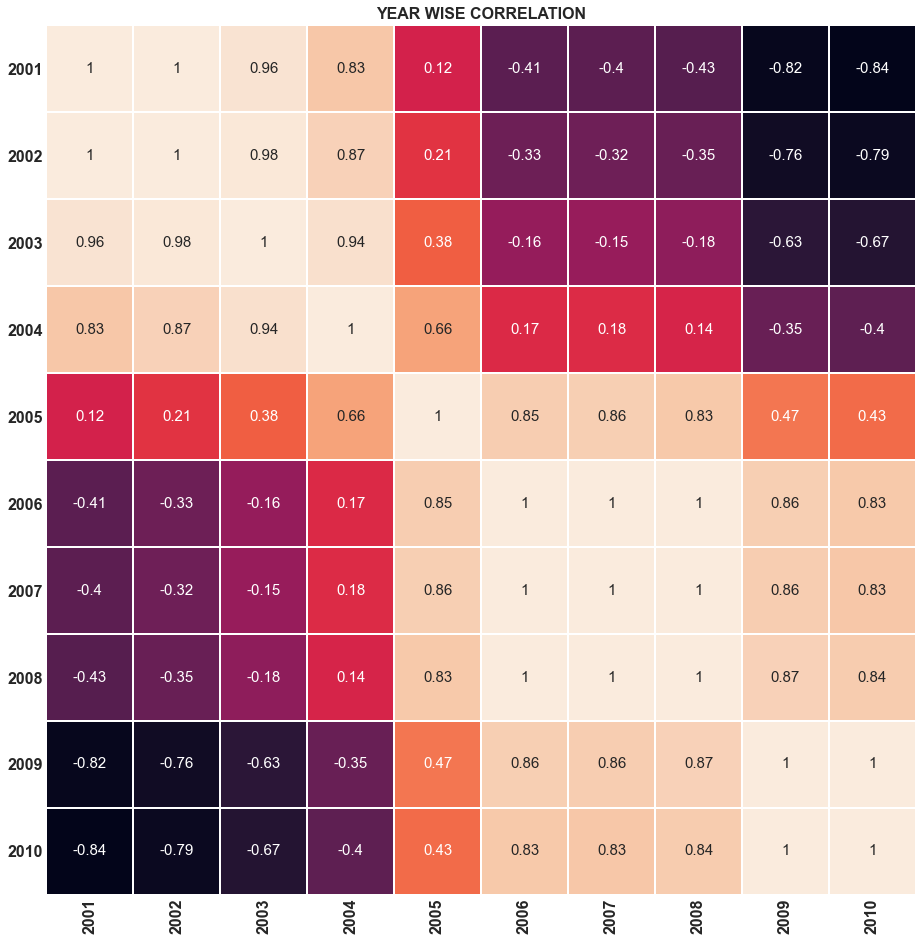

In [103]:
plt.figure(figsize=(16,16))
sns.heatmap(df_corr_year.corr(), annot=True, cbar= False, square = True, linewidths=0.5, linecolor = 'w', annot_kws={'size':15})
plt.ylim([10,0])
plt.xticks(fontsize=16,fontweight='bold', ha = 'center', rotation = 90)
plt.yticks(fontsize=16,fontweight='bold', ha = 'right', rotation = 0)
plt.title('YEAR WISE CORRELATION', fontsize = 16, fontweight = 'bold')
plt.show()

#### Years 2001, 2002, 2003, 2004 are highly positively correlated.  Years 2009 and 2010 are highly negatively correlated.  Years 2005, 2006, 2007 and 2008 are least correlated.  

# 5. Clustering (k means & hierarchical)

### 5.1.	Using the best and worst performing year column’s employment data (2.3) undertake a K means clustering analysis (K=2 & 3) and identify industries cluster together.  Write your own interpretation (~100 words).

In [36]:
df_kmeans = df_wales.reset_index()[['Industry','2008','2001']]
df_kmeans

Industry    2008    2001
0            Agriculture   39100   32900
1             Production  182200  209500
2           Construction  108100   85100
3                 Retail  356200  342600
4                    ICT   27700   24800
5                Finance   34900   26200
6            Real_Estate   15300   11700
7   Professional_Service  139100  106600
8  Public_Administration  409900  355000
9          Other_Service   63700   58100

In [37]:
dfkmeans_val = df_kmeans.iloc[:, [1,2]].values

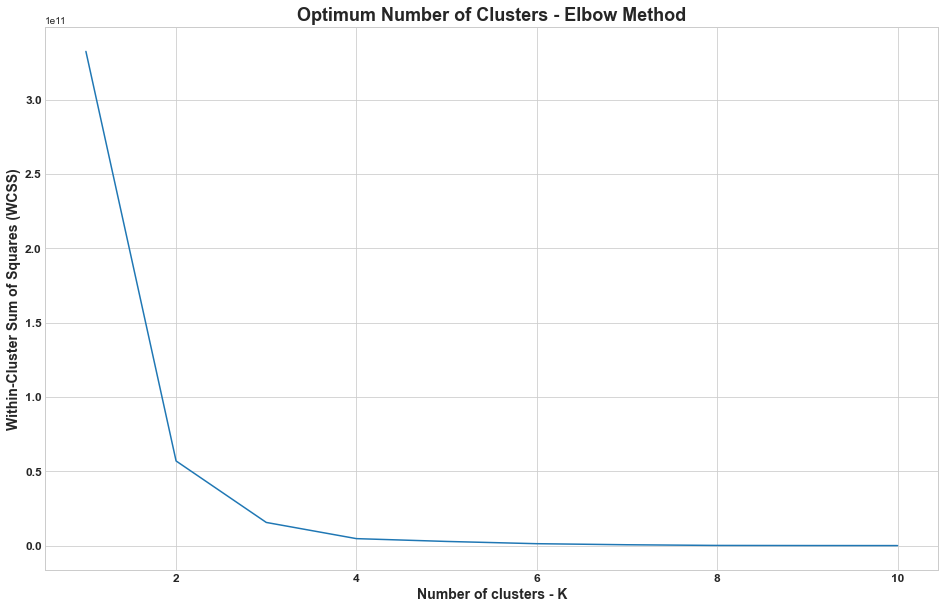

In [38]:
opt_clusters = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
    kmeans.fit(dfkmeans_val)
    opt_clusters.append(kmeans.inertia_)
plt.figure(figsize=(16,10))
plt.plot(range(1, 11),opt_clusters)
plt.title('Optimum Number of Clusters - Elbow Method', fontsize = 18, fontweight = 'bold')
plt.xlabel('Number of clusters - K', fontsize = 14, fontweight = 'bold')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.show()

#### The above graph shows a curve that exhibits an elbow which determines the optimum number of clusters. The optimum number of clusters in the above graph is 3.

In [39]:
kmeans_2=KMeans(n_clusters=2, init='k-means++', max_iter= 300, n_init= 10, tol = 1e-04, random_state= 0)
y_kmeans2=kmeans_2.fit_predict(dfkmeans_val)
df_kmeans['Kmeans2']=y_kmeans2

kmeans_3=KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, tol = 1e-04, random_state= 0)
y_kmeans3 = kmeans_3.fit_predict(dfkmeans_val)
df_kmeans['Kmeans3']=y_kmeans3
df_kmeans

Industry    2008    2001  Kmeans2  Kmeans3
0            Agriculture   39100   32900        1        2
1             Production  182200  209500        1        1
2           Construction  108100   85100        1        1
3                 Retail  356200  342600        0        0
4                    ICT   27700   24800        1        2
5                Finance   34900   26200        1        2
6            Real_Estate   15300   11700        1        2
7   Professional_Service  139100  106600        1        1
8  Public_Administration  409900  355000        0        0
9          Other_Service   63700   58100        1        2

### K - means Clustering Analysis (k = 2)

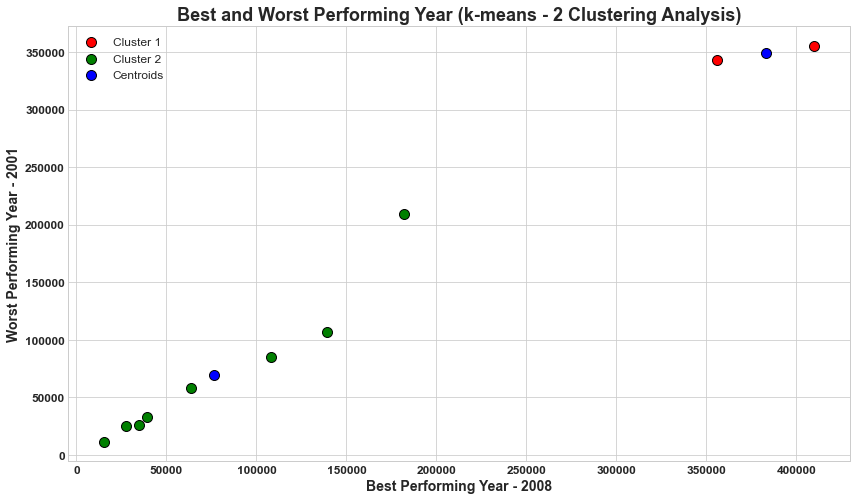

In [40]:
plt.figure(figsize = (14,8))
plt.scatter(dfkmeans_val[y_kmeans2 == 0, 0], dfkmeans_val[y_kmeans2 == 0, 1], s = 100, c = 'red', edgecolor = 'black', label='Cluster 1')
plt.scatter(dfkmeans_val[y_kmeans2 == 1, 0], dfkmeans_val[y_kmeans2 == 1, 1], s = 100, c = 'green', edgecolor = 'black', label='Cluster 2')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s = 100, c = 'blue', edgecolor = 'black', label='Centroids')
plt.title('Best and Worst Performing Year (k-means - 2 Clustering Analysis)', fontsize = 18, fontweight = 'bold')
plt.xlabel('Best Performing Year - 2008', fontsize = 14, fontweight = 'bold')
plt.ylabel('Worst Performing Year - 2001', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.legend(loc='best', fontsize = 12)
plt.show()

#### The above graph shows 2 clusters with a centroid for each cluster.  Cluster 1 has lower number of workforce than the cluster 2

### K - means Clustering Analysis (k = 3)

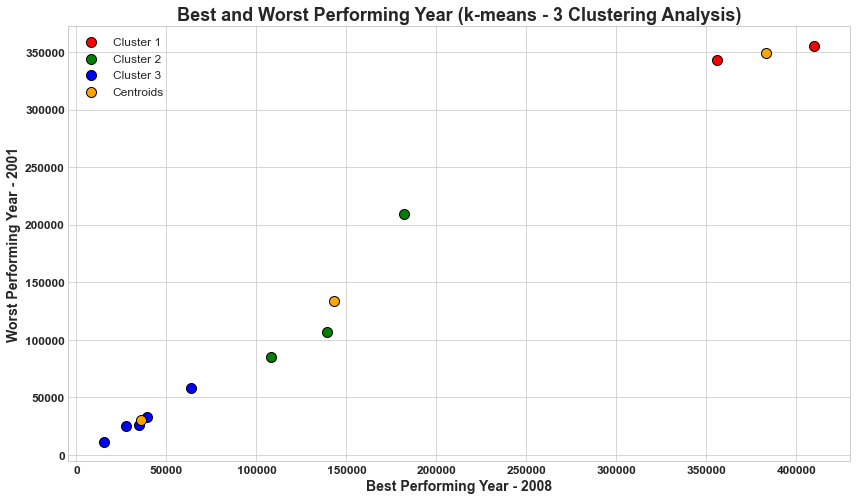

In [41]:
plt.figure(figsize = (14,8))
plt.scatter(dfkmeans_val[y_kmeans3 == 0, 0], dfkmeans_val[y_kmeans3 == 0, 1], s = 100, c = 'red', edgecolor = 'black', label='Cluster 1')
plt.scatter(dfkmeans_val[y_kmeans3 == 1, 0], dfkmeans_val[y_kmeans3 == 1, 1], s = 100, c = 'green', edgecolor = 'black', label='Cluster 2')
plt.scatter(dfkmeans_val[y_kmeans3 == 2, 0], dfkmeans_val[y_kmeans3 == 2, 1], s = 100, c = 'blue', edgecolor = 'black', label='Cluster 3')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s = 100, c = 'orange', edgecolor = 'black', label='Centroids')
plt.title('Best and Worst Performing Year (k-means - 3 Clustering Analysis)', fontsize = 18, fontweight = 'bold')
plt.xlabel('Best Performing Year - 2008', fontsize = 14, fontweight = 'bold')
plt.ylabel('Worst Performing Year - 2001', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.legend(loc='best', fontsize = 12)
plt.show()

#### The above graph shows 3 clusters with a centroid for each cluster.  The three clusters show a distinct number of workforce thereby segregating the similar workforce into each cluster.

### 5.2. Using the same dataset (best & worst performing) create a hierarchical cluster.  Compare the cluster with k means clusters.

In [42]:
df_hc = df_kmeans.drop(df_kmeans.columns[[3,4]], axis=1)
df_hc

Industry    2008    2001
0            Agriculture   39100   32900
1             Production  182200  209500
2           Construction  108100   85100
3                 Retail  356200  342600
4                    ICT   27700   24800
5                Finance   34900   26200
6            Real_Estate   15300   11700
7   Professional_Service  139100  106600
8  Public_Administration  409900  355000
9          Other_Service   63700   58100

In [43]:
df_hc.set_index('Industry', inplace = True)
df_hc

2008    2001
Industry                             
Agriculture             39100   32900
Production             182200  209500
Construction           108100   85100
Retail                 356200  342600
ICT                     27700   24800
Finance                 34900   26200
Real_Estate             15300   11700
Professional_Service   139100  106600
Public_Administration  409900  355000
Other_Service           63700   58100

In [44]:
df_hc_val = df_hc.iloc[:, [0,1]].values
df_hc_val

array([[ 39100,  32900],
       [182200, 209500],
       [108100,  85100],
       [356200, 342600],
       [ 27700,  24800],
       [ 34900,  26200],
       [ 15300,  11700],
       [139100, 106600],
       [409900, 355000],
       [ 63700,  58100]], dtype=int64)

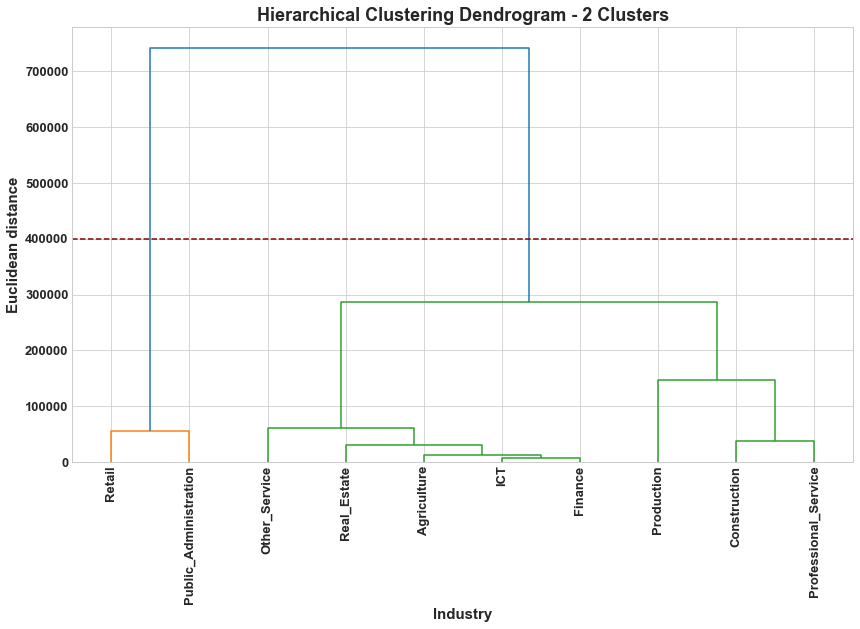

In [45]:
plt.figure(figsize=(14,8))
dendgram = sch.dendrogram(sch.linkage(df_hc_val, method  = "ward"), labels=df_hc.index, leaf_rotation=90, leaf_font_size=14)
plt.title('Hierarchical Clustering Dendrogram - 2 Clusters', fontsize = 18, fontweight = 'bold')
plt.xlabel('Industry', fontsize = 15, fontweight = 'bold')
plt.ylabel('Euclidean distance', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.yticks(fontsize = 13, fontweight = 'bold')
plt.axhline(y=400000, color='maroon', linestyle='--')
plt.show()

#### Line cuts the dendrogram at 2 points.  Hence 2 clusters

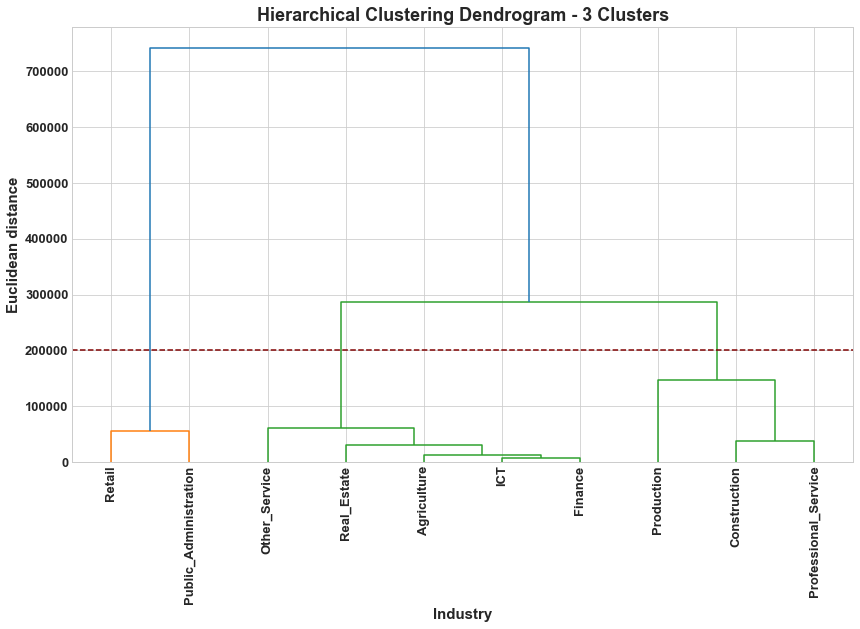

In [46]:
plt.figure(figsize=(14,8))
dendgram = sch.dendrogram(sch.linkage(df_hc_val, method  = "ward"), labels=df_hc.index, leaf_rotation=90, leaf_font_size=14)
plt.title('Hierarchical Clustering Dendrogram - 3 Clusters', fontsize = 18, fontweight = 'bold')
plt.xlabel('Industry', fontsize = 15, fontweight = 'bold')
plt.ylabel('Euclidean distance', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.yticks(fontsize = 13, fontweight = 'bold')
plt.axhline(y=200000, color='maroon', linestyle='--')
plt.show()

#### Line cuts the dendrogram at 3 points.  Hence 3 Clusters

### Hierarchical Clustering Visualization - 2 & 3 Clusters

In [47]:
hier_Clusters_2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
y_hclusters_2 = hier_Clusters_2.fit_predict(df_hc_val)
df_hc['H_Clusters_ 2']=y_hclusters_2

hier_Clusters_3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
y_hclusters_3 = hier_Clusters_3.fit_predict(df_hc_val)
df_hc['H_Clusters_3']=y_hclusters_3

In [48]:
df_hc.reset_index(inplace=True)
df_hc

Industry    2008    2001  H_Clusters_ 2  H_Clusters_3
0            Agriculture   39100   32900              0             2
1             Production  182200  209500              0             0
2           Construction  108100   85100              0             0
3                 Retail  356200  342600              1             1
4                    ICT   27700   24800              0             2
5                Finance   34900   26200              0             2
6            Real_Estate   15300   11700              0             2
7   Professional_Service  139100  106600              0             0
8  Public_Administration  409900  355000              1             1
9          Other_Service   63700   58100              0             2

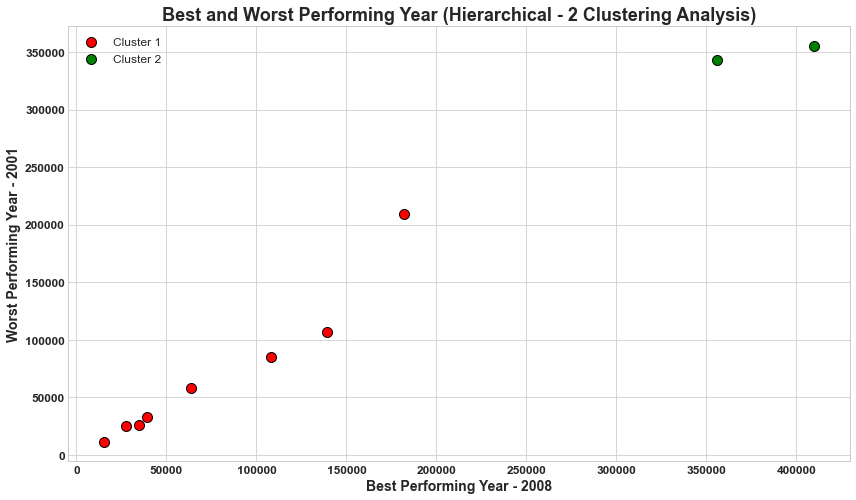

In [49]:
plt.figure(figsize = (14,8))
plt.scatter(df_hc_val[y_hclusters_2 == 0, 0], df_hc_val[y_hclusters_2 == 0, 1], s = 100, c = 'red', edgecolor = 'black', label='Cluster 1')
plt.scatter(df_hc_val[y_hclusters_2 == 1, 0], df_hc_val[y_hclusters_2 == 1, 1], s = 100, c = 'green', edgecolor = 'black', label='Cluster 2')
plt.title('Best and Worst Performing Year (Hierarchical - 2 Clustering Analysis)', fontsize = 18, fontweight = 'bold')
plt.xlabel('Best Performing Year - 2008', fontsize = 14, fontweight = 'bold')
plt.ylabel('Worst Performing Year - 2001', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.legend(loc='best', fontsize = 12)
plt.show()

#### The above graph shows 2 clusters with similar workforce within each cluster.  Cluster 1 has higher workforce than cluster 2.

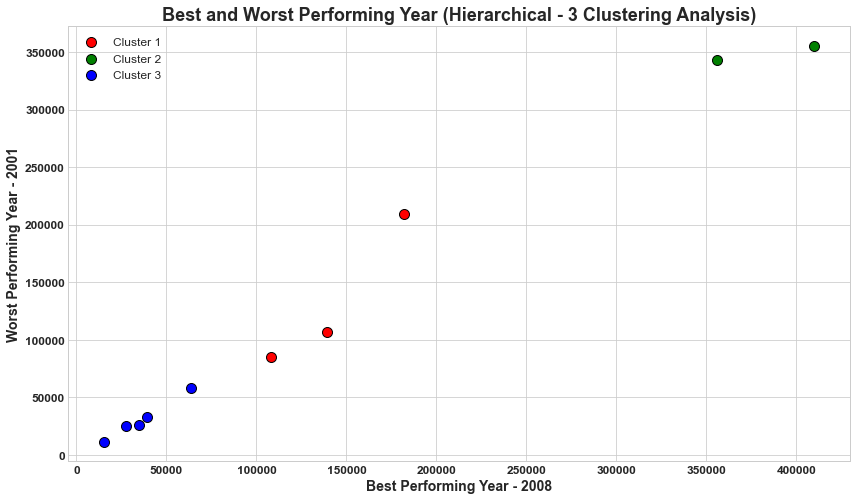

In [50]:
plt.figure(figsize = (14,8))
plt.scatter(df_hc_val[y_hclusters_3 == 0, 0], df_hc_val[y_hclusters_3 == 0, 1], s = 100, c = 'red', edgecolor = 'black', label='Cluster 1')
plt.scatter(df_hc_val[y_hclusters_3 == 1, 0], df_hc_val[y_hclusters_3 == 1, 1], s = 100, c = 'green', edgecolor = 'black', label='Cluster 2')
plt.scatter(df_hc_val[y_hclusters_3 == 2, 0], df_hc_val[y_hclusters_3 == 2, 1], s = 100, c = 'blue', edgecolor = 'black', label='Cluster 3')
plt.title('Best and Worst Performing Year (Hierarchical - 3 Clustering Analysis)', fontsize = 18, fontweight = 'bold')
plt.xlabel('Best Performing Year - 2008', fontsize = 14, fontweight = 'bold')
plt.ylabel('Worst Performing Year - 2001', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.legend(loc='best', fontsize = 12)
plt.show()

#### The above graph shows 3 clusters with similar workforce within each cluster.  Cluster 1 has the lowest workforce, Cluster 2 has medium workforce and Cluster 3 has the highest workforce.

# 6. Discussion

### Provide a brief discussion (~ 300 words) on employment landscape of Wales based on the employment data analysis results. 

#### The dataset obtained in section 1 shows the workforce employment or total job estimates for Wales. The dataset shows the estimates of the total jobs by industry for the years from 2001 to 2010. The data is analysed in a number of ways in each sections.  Public administration has the highest number of workers and Real estate has the lowest number of workers compared to other industries.  Professional Service saw the highest overall growth rate and Production overall growth rate declined drastically over the period compared to other industries. Year 2008 is the best performing year in terms of the number of employment. By the end of the year 2008 the employment rate began to decline drastically due to the greatest recession that has happened. 2001 is the worst performing year. The bubble plot visualization using the plotly express clearly explains the change in workforce over the years.  Production, Retail and Public Administration industries are not at all correlated as is evident from the Principal Component Analysis. Agriculture, Real Estate, ICT and Professional Service are highly correlated as seen in the heatmap analysis. Years 2001 to 2004 are highly correlated and the correlation decreased through the years till 2010. By using the Elbow method, the optimum number of clusters has been derived and is found to be 3. Agriculture, Finance, ICT, Real Estate and Other Service are clustered together (Cluster 1) as they have the least and nearly equal number of workforce. Production, Construction and Professional Service are clustered together (Cluster 2) as they have the medium number of workforce. Retail and Public Administration are clustered together (Cluster 3) as they have the highest number of workforce. K-means and Hierarchical clustering produce the same results but there are several advantages and disadvantages of their own. K-means can handle huge amounts of data as the time complexity of k-means is linear while Hierarchical clustering can't handle lage data as the time complexity is quadratic. K-means clustering works well when the shape of clusters is hyper spherical. K-means require prior knowledge of clusters while in hierarchical clustering the number of appropriate clusters can be found by interpreting the dendogram. 